In [169]:
import re 
import pandas as pd
from urlextract import URLExtract
from wordcloud import WordCloud
from collections import Counter
import emoji
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns
extract = URLExtract()

In [3]:
f= open('WhatsApp Chat with Purane Paapi😂.txt',encoding='utf-8')

In [4]:
data=f.read()

In [5]:
data

'9/7/15, 2:09 PM - Umesh created group "Scl days"\n9/7/15, 2:09 PM - Umesh added you\n9/7/15, 2:46 PM - Umesh: <Media omitted>\n9/7/15, 8:29 PM - ndevnani58: Shi londre\n9/7/15, 8:32 PM - Umesh: 😂😂😂\n9/7/15, 11:37 PM - Umesh: <Media omitted>\n9/13/15, 10:22 PM - ndevnani58: Koi zindha h bhi iss grup me\n9/13/15, 10:22 PM - ndevnani58: Umesh k alava\n9/13/15, 10:22 PM - ndevnani58: Saaloo hramkhoro shrm kro\n9/13/15, 10:22 PM - ndevnani58: Itna time hoga h kisi se bhi dhng se bat nhi hui h\n9/13/15, 10:22 PM - Raghav: Bhai 3 din tk to me nai hu\n9/13/15, 10:22 PM - Raghav: Exam h\n9/13/15, 10:22 PM - Raghav: 😏😏😏\n9/13/15, 10:23 PM - ndevnani58: Semester h\n9/13/15, 10:23 PM - Raghav: Na b\n9/13/15, 10:23 PM - Raghav: Mid terms\n9/13/15, 10:23 PM - ndevnani58: Konsa sem. Chl raha h tera\n9/13/15, 10:24 PM - Raghav: Mc 3rd h\n9/13/15, 10:25 PM - ndevnani58: Or abhi se mid terms\n9/13/15, 10:25 PM - ndevnani58: To sem.. Kbh hoga\n9/13/15, 10:26 PM - Raghav: Dec me\n9/13/15, 10:27 PM - ndev

In [6]:
print(data)

9/7/15, 2:09 PM - Umesh created group "Scl days"
9/7/15, 2:09 PM - Umesh added you
9/7/15, 2:46 PM - Umesh: <Media omitted>
9/7/15, 8:29 PM - ndevnani58: Shi londre
9/7/15, 8:32 PM - Umesh: 😂😂😂
9/7/15, 11:37 PM - Umesh: <Media omitted>
9/13/15, 10:22 PM - ndevnani58: Koi zindha h bhi iss grup me
9/13/15, 10:22 PM - ndevnani58: Umesh k alava
9/13/15, 10:22 PM - ndevnani58: Saaloo hramkhoro shrm kro
9/13/15, 10:22 PM - ndevnani58: Itna time hoga h kisi se bhi dhng se bat nhi hui h
9/13/15, 10:22 PM - Raghav: Bhai 3 din tk to me nai hu
9/13/15, 10:22 PM - Raghav: Exam h
9/13/15, 10:22 PM - Raghav: 😏😏😏
9/13/15, 10:23 PM - ndevnani58: Semester h
9/13/15, 10:23 PM - Raghav: Na b
9/13/15, 10:23 PM - Raghav: Mid terms
9/13/15, 10:23 PM - ndevnani58: Konsa sem. Chl raha h tera
9/13/15, 10:24 PM - Raghav: Mc 3rd h
9/13/15, 10:25 PM - ndevnani58: Or abhi se mid terms
9/13/15, 10:25 PM - ndevnani58: To sem.. Kbh hoga
9/13/15, 10:26 PM - Raghav: Dec me
9/13/15, 10:27 PM - ndevnani58: Ohhh
9/13/15, 

In [7]:
data_new=re.sub('\s?(AM|PM)','',data)
print(data_new)

9/7/15, 2:09 - Umesh created group "Scl days"
9/7/15, 2:09 - Umesh added you
9/7/15, 2:46 - Umesh: <Media omitted>
9/7/15, 8:29 - ndevnani58: Shi londre
9/7/15, 8:32 - Umesh: 😂😂😂
9/7/15, 11:37 - Umesh: <Media omitted>
9/13/15, 10:22 - ndevnani58: Koi zindha h bhi iss grup me
9/13/15, 10:22 - ndevnani58: Umesh k alava
9/13/15, 10:22 - ndevnani58: Saaloo hramkhoro shrm kro
9/13/15, 10:22 - ndevnani58: Itna time hoga h kisi se bhi dhng se bat nhi hui h
9/13/15, 10:22 - Raghav: Bhai 3 din tk to me nai hu
9/13/15, 10:22 - Raghav: Exam h
9/13/15, 10:22 - Raghav: 😏😏😏
9/13/15, 10:23 - ndevnani58: Semester h
9/13/15, 10:23 - Raghav: Na b
9/13/15, 10:23 - Raghav: Mid terms
9/13/15, 10:23 - ndevnani58: Konsa sem. Chl raha h tera
9/13/15, 10:24 - Raghav: Mc 3rd h
9/13/15, 10:25 - ndevnani58: Or abhi se mid terms
9/13/15, 10:25 - ndevnani58: To sem.. Kbh hoga
9/13/15, 10:26 - Raghav: Dec me
9/13/15, 10:27 - ndevnani58: Ohhh
9/13/15, 10:27 - ndevnani58: Or suna saale ajmer tu kbhi mila hi nhi
9/13/1

In [8]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'#9/7/15 2:09  - 

In [9]:
messages=re.split(pattern,data_new)[4:]
messages

['ndevnani58: Shi londre\n',
 'Umesh: 😂😂😂\n',
 'Umesh: <Media omitted>\n',
 'ndevnani58: Koi zindha h bhi iss grup me\n',
 'ndevnani58: Umesh k alava\n',
 'ndevnani58: Saaloo hramkhoro shrm kro\n',
 'ndevnani58: Itna time hoga h kisi se bhi dhng se bat nhi hui h\n',
 'Raghav: Bhai 3 din tk to me nai hu\n',
 'Raghav: Exam h\n',
 'Raghav: 😏😏😏\n',
 'ndevnani58: Semester h\n',
 'Raghav: Na b\n',
 'Raghav: Mid terms\n',
 'ndevnani58: Konsa sem. Chl raha h tera\n',
 'Raghav: Mc 3rd h\n',
 'ndevnani58: Or abhi se mid terms\n',
 'ndevnani58: To sem.. Kbh hoga\n',
 'Raghav: Dec me\n',
 'ndevnani58: Ohhh\n',
 'ndevnani58: Or suna saale ajmer tu kbhi mila hi nhi\n',
 'Raghav: 😅😅😅\n',
 'Raghav: Abi padne de\n',
 'Raghav: Bd me btunga\n',
 'ndevnani58: Sirf umesh nd nd mayank hi milte h\n',
 'ndevnani58: K bhai pdle\n',
 'Raghav: Bhai eng chod Di kya tune?\n',
 'ndevnani58: Na bhai\n',
 'Raghav: K\n',
 'Mayank Ajmer: <Media omitted>\n',
 "+91 77425 09334: Bhailog.. Hw's everyone?\n",
 'Raghav: Badi

In [10]:
dates=re.findall(pattern,data_new)[3:]
dates

['9/7/15, 8:29 - ',
 '9/7/15, 8:32 - ',
 '9/7/15, 11:37 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:22 - ',
 '9/13/15, 10:23 - ',
 '9/13/15, 10:23 - ',
 '9/13/15, 10:23 - ',
 '9/13/15, 10:23 - ',
 '9/13/15, 10:24 - ',
 '9/13/15, 10:25 - ',
 '9/13/15, 10:25 - ',
 '9/13/15, 10:26 - ',
 '9/13/15, 10:27 - ',
 '9/13/15, 10:27 - ',
 '9/13/15, 10:27 - ',
 '9/13/15, 10:28 - ',
 '9/13/15, 10:28 - ',
 '9/13/15, 10:28 - ',
 '9/13/15, 10:28 - ',
 '9/13/15, 10:29 - ',
 '9/13/15, 10:30 - ',
 '9/13/15, 10:30 - ',
 '10/2/15, 3:24 - ',
 '10/7/15, 9:59 - ',
 '10/7/15, 10:00 - ',
 '10/7/15, 10:00 - ',
 '10/7/15, 10:00 - ',
 '10/7/15, 10:01 - ',
 '10/7/15, 10:01 - ',
 '10/7/15, 10:01 - ',
 '10/7/15, 10:01 - ',
 '10/7/15, 10:01 - ',
 '10/7/15, 10:01 - ',
 '10/7/15, 10:02 - ',
 '10/7/15, 10:02 - ',
 '10/7/15, 10:02 - ',
 '10/7/15, 10:02 - ',
 '10/7/15, 10:03 - ',
 '10/7/15, 10:03 - ',
 '10/7/15, 10:03 

In [11]:
dates_new=[]
for check in dates:
    check=re.sub('-','',check)
    check=check.split()
    dates_new.append(''.join(check))

In [12]:
dates_new

['9/7/15,8:29',
 '9/7/15,8:32',
 '9/7/15,11:37',
 '9/13/15,10:22',
 '9/13/15,10:22',
 '9/13/15,10:22',
 '9/13/15,10:22',
 '9/13/15,10:22',
 '9/13/15,10:22',
 '9/13/15,10:22',
 '9/13/15,10:23',
 '9/13/15,10:23',
 '9/13/15,10:23',
 '9/13/15,10:23',
 '9/13/15,10:24',
 '9/13/15,10:25',
 '9/13/15,10:25',
 '9/13/15,10:26',
 '9/13/15,10:27',
 '9/13/15,10:27',
 '9/13/15,10:27',
 '9/13/15,10:28',
 '9/13/15,10:28',
 '9/13/15,10:28',
 '9/13/15,10:28',
 '9/13/15,10:29',
 '9/13/15,10:30',
 '9/13/15,10:30',
 '10/2/15,3:24',
 '10/7/15,9:59',
 '10/7/15,10:00',
 '10/7/15,10:00',
 '10/7/15,10:00',
 '10/7/15,10:01',
 '10/7/15,10:01',
 '10/7/15,10:01',
 '10/7/15,10:01',
 '10/7/15,10:01',
 '10/7/15,10:01',
 '10/7/15,10:02',
 '10/7/15,10:02',
 '10/7/15,10:02',
 '10/7/15,10:02',
 '10/7/15,10:03',
 '10/7/15,10:03',
 '10/7/15,10:03',
 '10/7/15,10:03',
 '10/7/15,10:03',
 '10/7/15,10:03',
 '10/7/15,10:04',
 '10/7/15,10:04',
 '10/7/15,10:05',
 '10/7/15,10:05',
 '10/7/15,10:05',
 '10/7/15,10:05',
 '10/7/15,10:05',

In [13]:
df=pd.DataFrame({'messages':messages,'date':dates_new}).head(2000)
df

,messages,date
0,ndevnani58: Shi londre\n,"9/7/15,8:29"
1,Umesh: 😂😂😂\n,"9/7/15,8:32"
2,Umesh: <Media omitted>\n,"9/7/15,11:37"
3,ndevnani58: Koi zindha h bhi iss grup me\n,"9/13/15,10:22"
4,ndevnani58: Umesh k alava\n,"9/13/15,10:22"
...,...,...
1995,Sankalp Ajmer: Thanx bhaiyo\n,"1/20/16,12:09"
1996,Sankalp Ajmer: 😃😃\n,"1/20/16,12:09"
1997,Umesh: Ya I known I'll won\n,"1/20/16,12:23"
1998,Umesh: Know tomorrow party from your side\n,"1/20/16,12:24"


In [14]:
df['date']=pd.to_datetime(df['date'],format='%m/%d/%y,%H:%M')
df.head()

,messages,date
0,ndevnani58: Shi londre\n,2015-09-07 08:29:00
1,Umesh: 😂😂😂\n,2015-09-07 08:32:00
2,Umesh: <Media omitted>\n,2015-09-07 11:37:00
3,ndevnani58: Koi zindha h bhi iss grup me\n,2015-09-13 10:22:00
4,ndevnani58: Umesh k alava\n,2015-09-13 10:22:00


In [15]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   messages  2000 non-null   object        
 1   date      2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 31.4+ KB


In [16]:
users=[]
messages=[]
for usr in df['messages']:
    entry = re.split('([\w\W]+?):\s', usr)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['messages'], inplace=True)        

In [17]:
df.head()

,date,user,message
0,2015-09-07 08:29:00,ndevnani58,Shi londre\n
1,2015-09-07 08:32:00,Umesh,😂😂😂\n
2,2015-09-07 11:37:00,Umesh,<Media omitted>\n
3,2015-09-13 10:22:00,ndevnani58,Koi zindha h bhi iss grup me\n
4,2015-09-13 10:22:00,ndevnani58,Umesh k alava\n


In [18]:
# Extrating data from date
df['date_dt']=df['date'].dt.date

In [19]:
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [132]:
df[['day_name', 'hour']]

,day_name,hour
0,Monday,8
1,Monday,8
2,Monday,11
3,Sunday,10
4,Sunday,10
...,...,...
1995,Wednesday,12
1996,Wednesday,12
1997,Wednesday,12
1998,Wednesday,12


In [138]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 12:
        period.append(str(hour) + "-" + str('01'))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df.to_csv('Converted_text.csv',index=False)

In [139]:
df.head()

,date,user,message,date_dt,year,month_num,month,day,day_name,hour,minute,period
0,2015-09-07 08:29:00,ndevnani58,Shi londre\n,2015-09-07,2015,9,September,7,Monday,8,29,8-9
1,2015-09-07 08:32:00,Umesh,😂😂😂\n,2015-09-07,2015,9,September,7,Monday,8,32,8-9
2,2015-09-07 11:37:00,Umesh,<Media omitted>\n,2015-09-07,2015,9,September,7,Monday,11,37,11-12
3,2015-09-13 10:22:00,ndevnani58,Koi zindha h bhi iss grup me\n,2015-09-13,2015,9,September,13,Sunday,10,22,10-11
4,2015-09-13 10:22:00,ndevnani58,Umesh k alava\n,2015-09-13,2015,9,September,13,Sunday,10,22,10-11


##  Stats of group or individual user

In [21]:
print('The no of indivisuals in this chat are:')
df['user'].unique()

The no of indivisuals in this chat are:


array(['ndevnani58', 'Umesh', 'Raghav', 'Mayank Ajmer', '+91 77425 09334',
       'group_notification', 'Mohit Ajmer', 'Sankalp Ajmer',
       '+91 98283 42381', 'Ahmed', '+91 82900 26586'], dtype=object)

In [22]:
#Removing group notification and adding Whole Squad as new value
ppl=list(df['user'].unique())
ppl.remove('group_notification')
ppl.insert(0,'Whole Squad')
ppl

['Whole Squad',
 'ndevnani58',
 'Umesh',
 'Raghav',
 'Mayank Ajmer',
 '+91 77425 09334',
 'Mohit Ajmer',
 'Sankalp Ajmer',
 '+91 98283 42381',
 'Ahmed',
 '+91 82900 26586']

In [23]:
selected_user=input('Select For Which individual/squad u want to do analysis: ')
if selected_user not in ppl:
    selected_user=input('Kindly give proper Name of user: ')
else:
    print('You have selected : ',selected_user)

Select For Which individual/squad u want to do analysis: 
Kindly give proper Name of user: Whole Squad


In [24]:
def fetch_stats(selected_user,df):
    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]
        
    # fetch the number of messages
    num_messages = df.shape[0]

    # fetch the total number of words
    words = []
    for message in df['message']:
        words.extend(message.split())

    # fetch number of media messages
    num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

    # fetch number of links shared
    links = []
    for message in df['message']:
        links.extend(extract.find_urls(message))

    return selected_user,num_messages,len(words),num_media_messages,len(links)


In [25]:
result=fetch_stats(selected_user,df)
print('For ',result[0],'below are the following observation: ')
print('No of messages: ',result[1],'\nNo of words: ', result[2],'\nNo of media: ',result[3],'\nLinks shared: ',result[4])

For  Whole Squad below are the following observation: 
No of messages:  2000 
No of words:  8806 
No of media:  159 
Links shared:  5


In [26]:
# This method will only work for whole sqad
def most_responding_users(df):
    x = df['user'].value_counts().head()
    df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
    return x,df


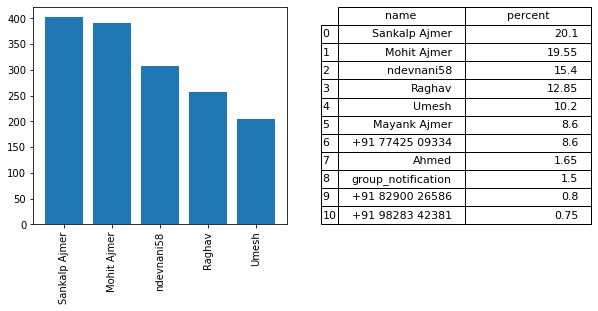

In [27]:
bbox=[0, 0, 1, 1]
font_size=14
if selected_user=='Whole Squad':
    user,data=most_responding_users(df)
    fig=plt.figure(figsize=(10,4))
    
    ax1=fig.add_subplot(121)
    ax1.bar(user.index,user.values)
    plt.xticks(rotation='vertical')
    
    ax2 = fig.add_subplot(122)
    ax2.axis('off')
    mpl_table = ax2.table(cellText = data.values, rowLabels = data.index, bbox=bbox, colLabels=data.columns)
    mpl_table.set_fontsize(font_size)
    plt.show()
    #display(data)

In [28]:
selected_user

'Whole Squad'

In [29]:
def create_wordcloud(selected_user,df):

    f = open('stop_hinglish.txt', 'r')
    stop_words = f.read()

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']
    
    def remove_stop_words(message):
        y = []
        for word in message.lower().split():
            if word not in stop_words:
                y.append(word)
        return " ".join(y)

    wc = WordCloud(width=500,height=500,min_font_size=10)
    temp['message'] = temp['message'].apply(remove_stop_words)
    df_wc = wc.generate(temp['message'].str.cat(sep=" "))
    print(df_wc)
    return df_wc

In [30]:
selected_user=input('Select For Which individual/squad u want to do analysis: ')
if selected_user not in ppl:
    selected_user=input('Kindly give proper Name of user: ')
else:
    print('Good choice')

Select For Which individual/squad u want to do analysis: 
Kindly give proper Name of user: Whole Squad


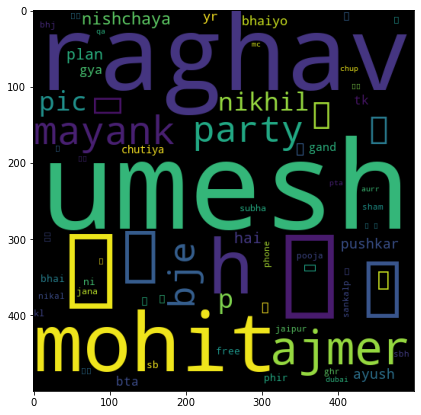

In [31]:
word_cloud=create_wordcloud(selected_user,df)
fig,ax = plt.subplots(figsize=(15,7))
ax.imshow(word_cloud)

In [ ]:
selected_user='Umesh'

In [32]:
def most_common_words(selected_user,df):

    f = open('stop_hinglish.txt','r')
    stop_words = f.read()

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']

    words = []

    for message in temp['message']:
        for word in message.lower().split():
            if word not in stop_words and string.punctuation:
                words.append(word)

    most_common_df = pd.DataFrame(Counter(words).most_common(20),columns=['msg','count'],index=None)
    return most_common_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
msg,😂,😅,umesh,😂😂,😂😂😂,mohit,raghav,😂😂😂😂,ajmer,bje,mayank,:p,party,nikhil,😌,nishchaya,😂😂😂😂😂,pic,gya,hai?
count,124,56,49,43,41,36,34,27,25,23,20,20,18,18,18,18,17,17,15,15


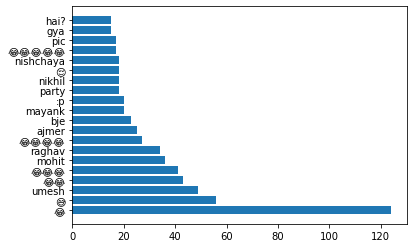

In [33]:
dataf=most_common_words(selected_user,df)
display(dataf.T)
plt.barh('msg','count',data=dataf)
plt.show()

In [52]:
df

,date,user,message,date_dt,year,month_num,month,day,day_name,hour,minute
0,2015-09-07 08:29:00,ndevnani58,Shi londre\n,2015-09-07,2015,9,September,7,Monday,8,29
1,2015-09-07 08:32:00,Umesh,😂😂😂\n,2015-09-07,2015,9,September,7,Monday,8,32
2,2015-09-07 11:37:00,Umesh,<Media omitted>\n,2015-09-07,2015,9,September,7,Monday,11,37
3,2015-09-13 10:22:00,ndevnani58,Koi zindha h bhi iss grup me\n,2015-09-13,2015,9,September,13,Sunday,10,22
4,2015-09-13 10:22:00,ndevnani58,Umesh k alava\n,2015-09-13,2015,9,September,13,Sunday,10,22
...,...,...,...,...,...,...,...,...,...,...,...
1995,2016-01-20 12:09:00,Sankalp Ajmer,Thanx bhaiyo\n,2016-01-20,2016,1,January,20,Wednesday,12,9
1996,2016-01-20 12:09:00,Sankalp Ajmer,😃😃\n,2016-01-20,2016,1,January,20,Wednesday,12,9
1997,2016-01-20 12:23:00,Umesh,Ya I known I'll won\n,2016-01-20,2016,1,January,20,Wednesday,12,23
1998,2016-01-20 12:24:00,Umesh,Know tomorrow party from your side\n,2016-01-20,2016,1,January,20,Wednesday,12,24


In [40]:
selected_user='ndevnani58'

In [41]:
def emoji_helper(selected_user,df):
    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    emojis = []
    for message in df['message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

    emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))),columns=['emoji','count'])

    return emoji_df

C:\Users\Yash\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yash\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yash\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yash\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0, flags=flags)


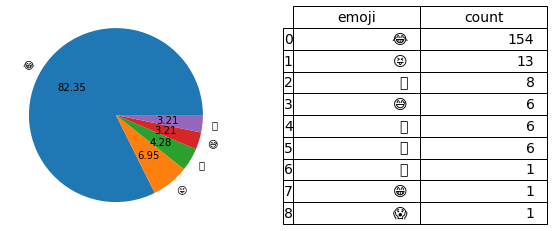

In [51]:
bbox=[0, 0, 1, 1]
font_size=14

emo=emoji_helper(selected_user,df)
fig=plt.figure(figsize=(10,4))

ax1=fig.add_subplot(121)
ax1.pie(x=emo['count'].head(),labels=emo['emoji'].head(),autopct='%0.2f')
    
ax2 = fig.add_subplot(122)
ax2.axis('off')
mpl_table = ax2.table(cellText = emo.values, rowLabels = emo.index, bbox=bbox, colLabels=emo.columns)
mpl_table.set_fontsize(font_size)
plt.show()
    
    #display(data)

In [79]:
df

,date,user,message,date_dt,year,month_num,month,day,day_name,hour,minute
0,2015-09-07 08:29:00,ndevnani58,Shi londre\n,2015-09-07,2015,9,September,7,Monday,8,29
1,2015-09-07 08:32:00,Umesh,😂😂😂\n,2015-09-07,2015,9,September,7,Monday,8,32
2,2015-09-07 11:37:00,Umesh,<Media omitted>\n,2015-09-07,2015,9,September,7,Monday,11,37
3,2015-09-13 10:22:00,ndevnani58,Koi zindha h bhi iss grup me\n,2015-09-13,2015,9,September,13,Sunday,10,22
4,2015-09-13 10:22:00,ndevnani58,Umesh k alava\n,2015-09-13,2015,9,September,13,Sunday,10,22
...,...,...,...,...,...,...,...,...,...,...,...
1995,2016-01-20 12:09:00,Sankalp Ajmer,Thanx bhaiyo\n,2016-01-20,2016,1,January,20,Wednesday,12,9
1996,2016-01-20 12:09:00,Sankalp Ajmer,😃😃\n,2016-01-20,2016,1,January,20,Wednesday,12,9
1997,2016-01-20 12:23:00,Umesh,Ya I known I'll won\n,2016-01-20,2016,1,January,20,Wednesday,12,23
1998,2016-01-20 12:24:00,Umesh,Know tomorrow party from your side\n,2016-01-20,2016,1,January,20,Wednesday,12,24


In [77]:
def monthly_timeline(selected_user,df):

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

    timeline['time']=timeline['year'].apply(lambda x: str(x))+'-'+timeline['month']

    return timeline


In [84]:
selected_user='Whole Squad'

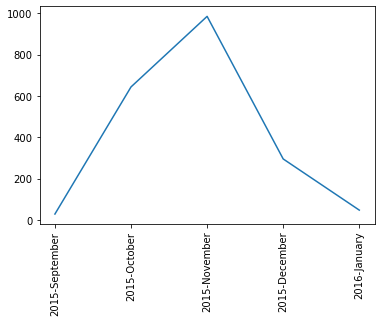

In [85]:
line=monthly_timeline(selected_user,df)
plt.plot(line['time'],line['message'])
plt.xticks(rotation='vertical')
plt.show()


In [109]:

def daily_timeline(selected_user,df):

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    daily_timeline = df.groupby('date_dt').count()['message'].reset_index()

    return daily_timeline

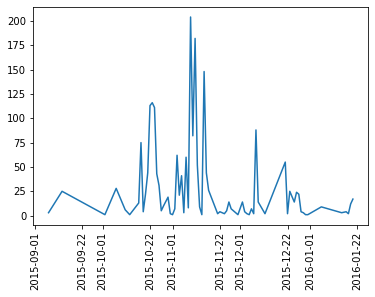

In [110]:
daily_time=daily_timeline(selected_user,df)
plt.plot(daily_time['date_dt'],daily_time['message'])
plt.xticks(rotation='vertical')
plt.show()

In [111]:
def week_activity_map(selected_user,df):

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    return df['day_name'].value_counts()

In [117]:
def month_activity_map(selected_user,df):

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    return df['month'].value_counts()

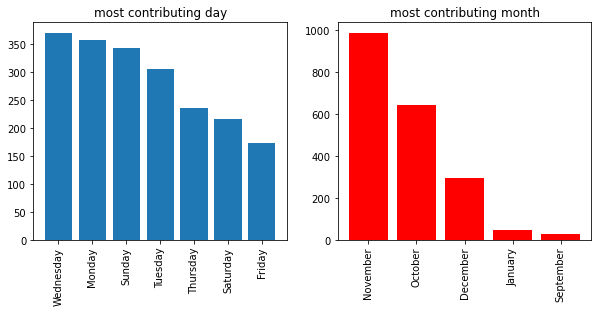

In [128]:
plt.figure(figsize=(10,4))
ax1=plt.subplot(1,2,1)
plt.title('most contributing day')
week=week_activity_map(selected_user,df)
ax1.bar(week.index,week.values)
plt.xticks(rotation='vertical')

ax2=plt.subplot(1,2,2)
plt.title('most contributing month')
mon=month_activity_map(selected_user,df)
ax2.bar(mon.index,mon.values,color='r')
plt.xticks(rotation='vertical')
plt.show()

In [173]:
def activity_heatmap(selected_user,df):

    if selected_user != 'Whole Squad':
        df = df[df['user'] == selected_user]

    user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count',fill_value=0)
    #Follows below method 
#     ind=np.where((df['period']=='10-11') & (df['day_name']=='Friday'))
#     df.loc[ind].shape[0]

    return user_heatmap

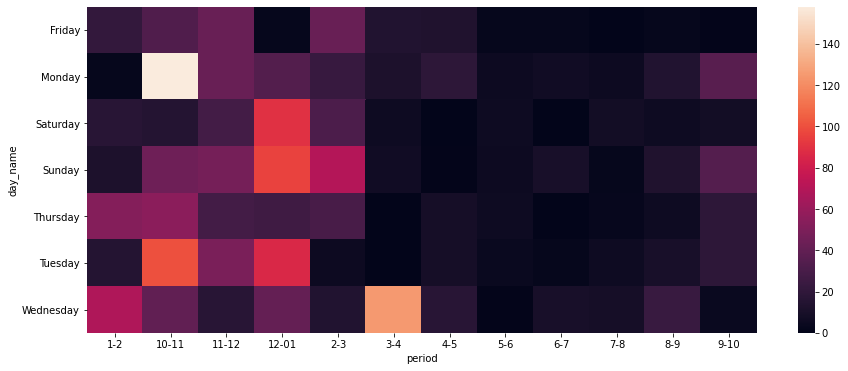

In [184]:
plt.figure(figsize=(15,6))
sns.heatmap(activity_heatmap(selected_user,df))
plt.yticks(rotation=360)
plt.show()